#MACHINE LEARNING: DADOS MULTIDIMENSIONAIS

## Importando Base

In [4]:
import pandas as pd

In [5]:
resultado_exames = pd.read_csv("/content/drive/MyDrive/Alura/CSV/exames.csv")
resultado_exames.head()

,id,diagnostico,exame_1,exame_2,exame_3,exame_4,exame_5,exame_6,exame_7,exame_8,...,exame_24,exame_25,exame_26,exame_27,exame_28,exame_29,exame_30,exame_31,exame_32,exame_33
0,842302,M,17.99,10.38,122.80,103.78,1001.0,0.11840,0.27760,0.3001,...,184.60,2019.0,0.1622,0.6656,0.7119,0.786,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,103.78,1326.0,0.08474,0.07864,0.0869,...,158.80,1956.0,0.1238,0.1866,0.2416,0.786,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,103.78,1203.0,0.10960,0.15990,0.1974,...,152.50,1709.0,0.1444,0.4245,0.4504,0.786,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,103.78,386.1,0.14250,0.28390,0.2414,...,98.87,567.7,0.2098,0.8663,0.6869,0.786,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,103.78,1297.0,0.10030,0.13280,0.1980,...,152.20,1575.0,0.1374,0.2050,0.4000,0.786,0.1625,0.2364,0.07678,0.854454


## Separando dados de treino e teste através da função "train_test_split"

In [6]:
from sklearn.model_selection import train_test_split
import numpy as np

In [7]:
np.random.seed(123143)

exames = resultado_exames.drop(["diagnostico","id","exame_33"],axis=1)
diagnostico = resultado_exames["diagnostico"]

treino_x,teste_x,treino_y,teste_y = train_test_split(exames,diagnostico,
                                                     test_size=0.3)

In [8]:
 from sklearn.ensemble import RandomForestClassifier

In [9]:
classificador = RandomForestClassifier(n_estimators=100)
classificador.fit(treino_x,treino_y)
print(f"Taxa de acerto: {classificador.score(teste_x,teste_y)*100:0.2f}%")
predito_rf = classificador.predict(teste_x)

Taxa de acerto: 92.40%


## Trabalhando com valores vazios

In [10]:
resultado_exames.isna().sum()

id               0
diagnostico      0
exame_1          0
exame_2          0
exame_3          0
exame_4          0
exame_5          0
exame_6          0
exame_7          0
exame_8          0
exame_9          0
exame_10         0
exame_11         0
exame_12         0
exame_13         0
exame_14         0
exame_15         0
exame_16         0
exame_17         0
exame_18         0
exame_19         0
exame_20         0
exame_21         0
exame_22         0
exame_23         0
exame_24         0
exame_25         0
exame_26         0
exame_27         0
exame_28         0
exame_29         0
exame_30         0
exame_31         0
exame_32         0
exame_33       419
dtype: int64

In [11]:
# resultado_exames.drop("exame_33",axis=1,inplace=True)

## Validando valores com uma baseline

In [12]:
from sklearn.dummy import DummyClassifier

In [13]:
SEED = 123143
np.random.seed(SEED)

classificador_bobo = DummyClassifier(strategy = "most_frequent")
classificador_bobo.fit(treino_x,treino_y)
print(f"Resultado da classificação: {classificador_bobo.score(teste_x,teste_y)*100:0.2f}%")

Resultado da classificação: 66.67%


In [14]:
from seaborn import violinplot
import matplotlib.pyplot as plt

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'exame_1'),
  Text(1, 0, 'exame_2'),
  Text(2, 0, 'exame_3'),
  Text(3, 0, 'exame_4'),
  Text(4, 0, 'exame_5'),
  Text(5, 0, 'exame_6'),
  Text(6, 0, 'exame_7'),
  Text(7, 0, 'exame_8'),
  Text(8, 0, 'exame_9'),
  Text(9, 0, 'exame_10')])

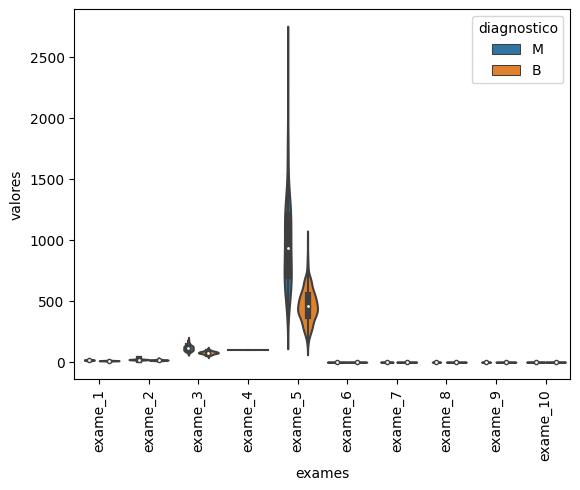

In [15]:
dados_plot = pd.concat([diagnostico,exames.iloc[:,0:10]], axis =1)
dados_plot = pd.melt(dados_plot, id_vars ="diagnostico",
                     var_name = "exames", value_name = "valores")
violinplot(x = "exames",y = "valores" , hue = "diagnostico", data = dados_plot)
plt.xticks(rotation = 90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]),
 [Text(0, 0, 'exame_1'),
  Text(1, 0, 'exame_2'),
  Text(2, 0, 'exame_3'),
  Text(3, 0, 'exame_4'),
  Text(4, 0, 'exame_5'),
  Text(5, 0, 'exame_6'),
  Text(6, 0, 'exame_7'),
  Text(7, 0, 'exame_8'),
  Text(8, 0, 'exame_9'),
  Text(9, 0, 'exame_10'),
  Text(10, 0, 'exame_11'),
  Text(11, 0, 'exame_12'),
  Text(12, 0, 'exame_13'),
  Text(13, 0, 'exame_14'),
  Text(14, 0, 'exame_15'),
  Text(15, 0, 'exame_16'),
  Text(16, 0, 'exame_17'),
  Text(17, 0, 'exame_18'),
  Text(18, 0, 'exame_19'),
  Text(19, 0, 'exame_20'),
  Text(20, 0, 'exame_21'),
  Text(21, 0, 'exame_22'),
  Text(22, 0, 'exame_23'),
  Text(23, 0, 'exame_24'),
  Text(24, 0, 'exame_25'),
  Text(25, 0, 'exame_26'),
  Text(26, 0, 'exame_27'),
  Text(27, 0, 'exame_28'),
  Text(28, 0, 'exame_29'),
  Text(29, 0, 'exame_30'),
  Text(30, 0, 'exame_31'),
  Text(31, 0, 'exame_32')])

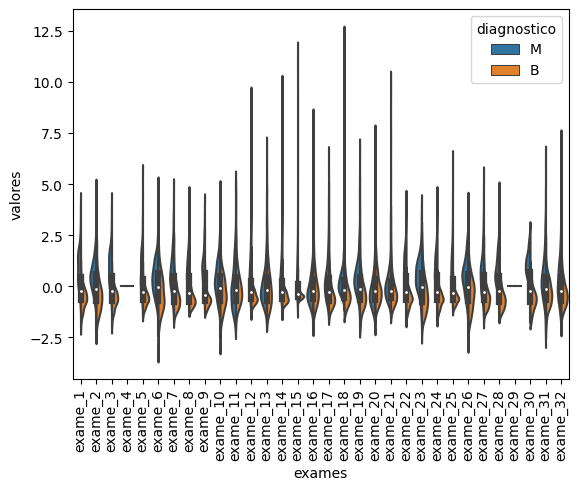

In [16]:
from sklearn.preprocessing import StandardScaler

padronizador = StandardScaler()
padronizador.fit(exames)
exames_2 = padronizador.transform(exames)
exames_2 = pd.DataFrame(data = exames_2, columns = exames.columns)

dados_plot = pd.concat([diagnostico,exames_2.iloc[:,0:32]], axis =1)
dados_plot = pd.melt(dados_plot, id_vars ="diagnostico",
                     var_name = "exames", value_name = "valores")
violinplot(x = "exames",y = "valores" , hue = "diagnostico", data = dados_plot,
           split = True)
plt.xticks(rotation = 90)

In [17]:
#o exame 4 é composto por valores contantes e por conta disso forma uma linha reta do gráfico
exames_2["exame_4"]

0      1.421085e-14
1      1.421085e-14
2      1.421085e-14
3      1.421085e-14
4      1.421085e-14
           ...     
564    1.421085e-14
565    1.421085e-14
566    1.421085e-14
567    1.421085e-14
568    1.421085e-14
Name: exame_4, Length: 569, dtype: float64

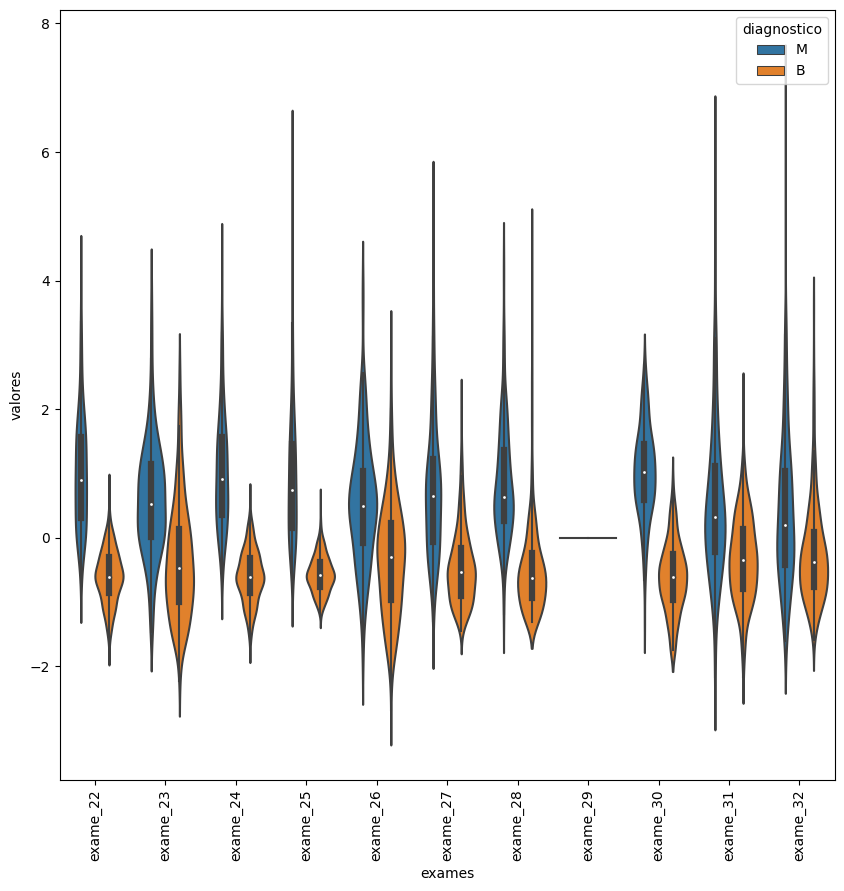

In [18]:
def grafico_violino(valores,inicio,fim):

  dados_plot = pd.concat([diagnostico,valores.iloc[:,inicio:fim]], axis =1)
  dados_plot = pd.melt(dados_plot, id_vars ="diagnostico",
                      var_name = "exames", value_name = "valores")
  plt.figure(figsize=(10,10))
  violinplot(x = "exames",y = "valores" , hue = "diagnostico", data = dados_plot)
  plt.xticks(rotation = 90)

grafico_violino(exames_2,21,32)

## Teste após excluir valores constantes

In [19]:
exames_3 = exames_2.drop(["exame_29","exame_4"],axis=1)

def classificar(valores):
  SEED = 1234
  np.random.seed(SEED)
  treino_x,teste_x,treino_y,teste_y = train_test_split(valores,diagnostico,
                                                     test_size=0.3)

  classificador = RandomForestClassifier(n_estimators=100)
  classificador.fit(treino_x,treino_y)
  print(f"Taxa de acerto: {classificador.score(teste_x,teste_y)*100:0.2f}%")

classificar(exames_3)

Taxa de acerto: 92.98%


In [20]:
exames_3.head()

,exame_1,exame_2,exame_3,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,exame_11,...,exame_22,exame_23,exame_24,exame_25,exame_26,exame_27,exame_28,exame_30,exame_31,exame_32
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


## Matriz de Correlação

In [21]:
import seaborn as sns

In [22]:
matriz_correlacao = exames_3.corr()

<Axes: >

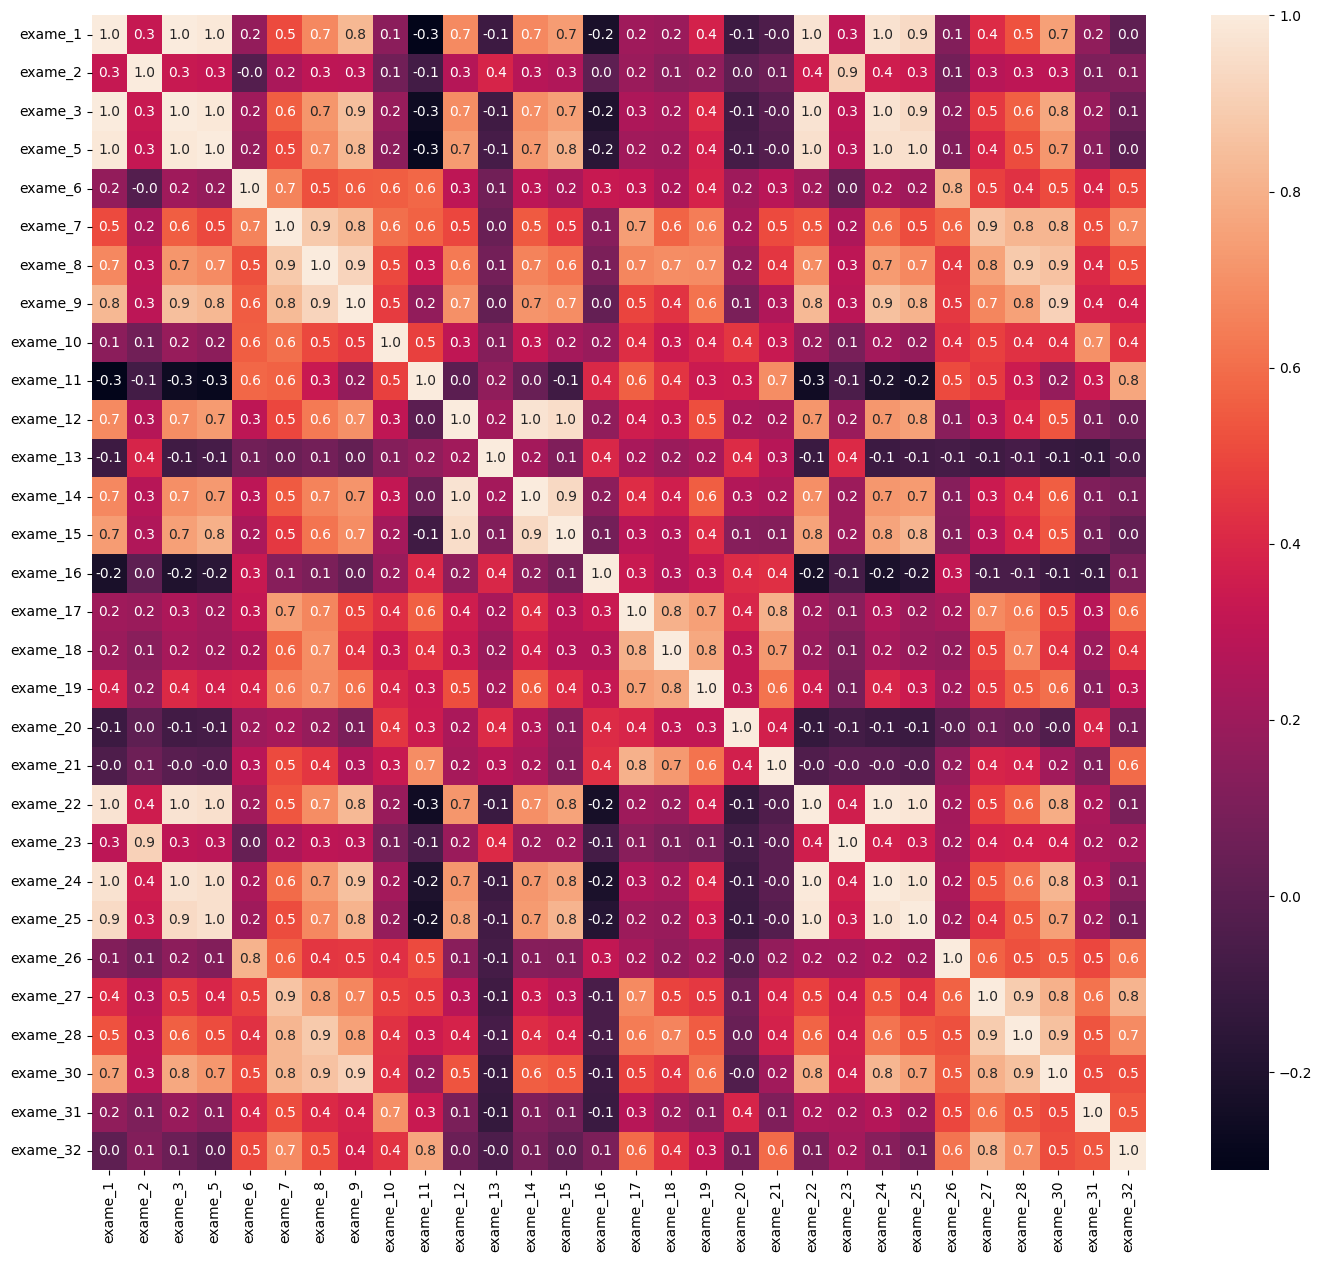

In [23]:
plt.figure(figsize=(17,15))
sns.heatmap(matriz_correlacao, annot = True, fmt=".1f")

## Excluindo valores com alta correlação

In [24]:
matriz_correlacao_v1 = matriz_correlacao[matriz_correlacao>0.99]

In [25]:
matriz_correlacao_v2 = matriz_correlacao_v1.sum()

In [26]:
matriz_correlacao_v2

exame_1     1.997855
exame_2     1.000000
exame_3     1.997855
exame_5     1.000000
exame_6     1.000000
exame_7     1.000000
exame_8     1.000000
exame_9     1.000000
exame_10    1.000000
exame_11    1.000000
exame_12    1.000000
exame_13    1.000000
exame_14    1.000000
exame_15    1.000000
exame_16    1.000000
exame_17    1.000000
exame_18    1.000000
exame_19    1.000000
exame_20    1.000000
exame_21    1.000000
exame_22    1.993708
exame_23    1.000000
exame_24    1.993708
exame_25    1.000000
exame_26    1.000000
exame_27    1.000000
exame_28    1.000000
exame_30    1.000000
exame_31    1.000000
exame_32    1.000000
dtype: float64

In [27]:
variaveis_correlacionadas = matriz_correlacao_v2[matriz_correlacao_v2>1]
variaveis_correlacionadas

exame_1     1.997855
exame_3     1.997855
exame_22    1.993708
exame_24    1.993708
dtype: float64

In [28]:
exames_4 = exames_3.drop(variaveis_correlacionadas.keys(),axis=1)

In [29]:
exames_4.head()

,exame_2,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,exame_11,exame_12,exame_13,...,exame_20,exame_21,exame_23,exame_25,exame_26,exame_27,exame_28,exame_30,exame_31,exame_32
0,-2.073335,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,2.489734,-0.565265,...,1.148757,0.907083,-1.359293,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,-0.353632,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,0.499255,-0.876244,...,-0.805450,-0.099444,-0.369203,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,0.456187,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,1.228676,-0.780083,...,0.237036,0.293559,-0.023974,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,0.253732,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,0.326373,-0.110409,...,4.732680,2.047511,0.133984,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,-1.151816,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,1.270543,-0.790244,...,-0.361092,0.499328,-1.466770,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


In [30]:
#A taxa de acerto diminuiu por excluimos todas as colunas correlacionadas, quando deveriamos deixar apenas uma
classificar(exames_4)

Taxa de acerto: 91.81%


In [31]:
exames_4 = exames_3.drop(["exame_3","exame_24"],axis=1)

In [32]:
classificar(exames_4)

Taxa de acerto: 92.98%


## Selecionar as kmelhores features

In [33]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [34]:
selecionar_kmelhores = SelectKBest(chi2,k=5)

In [35]:
SEED =1234
np.random.seed(SEED)

treino_x,teste_x,treino_y,teste_y = train_test_split(exames.drop(["exame_4",
                                                                  "exame_9",
                                                                  "exame_3",
                                                                  "exame_24"],
                                                                 axis=1),diagnostico,
                                                     test_size=0.3)
selecionar_kmelhores.fit(treino_x,treino_y)
treino_kbest = selecionar_kmelhores.transform(treino_x)
teste_kbest = selecionar_kmelhores.transform(teste_x)

In [36]:
treino_kbest.shape

(398, 5)

In [37]:
classificador = RandomForestClassifier(n_estimators =100, random_state=SEED)
classificador.fit(treino_kbest,treino_y)
print(f"Resultado {classificador.score(teste_kbest,teste_y)*100:0.2f}%")

Resultado 92.40%


## Matriz de confusão

In [38]:
from sklearn.metrics import confusion_matrix

In [40]:
matriz_confusao = confusion_matrix(teste_y,classificador.predict(teste_kbest))

In [41]:
matriz_confusao

array([[100,   5],
       [  8,  58]])

[Text(0.5, 40.249999999999986, 'Predição'), Text(77.25, 0.5, 'Real')]

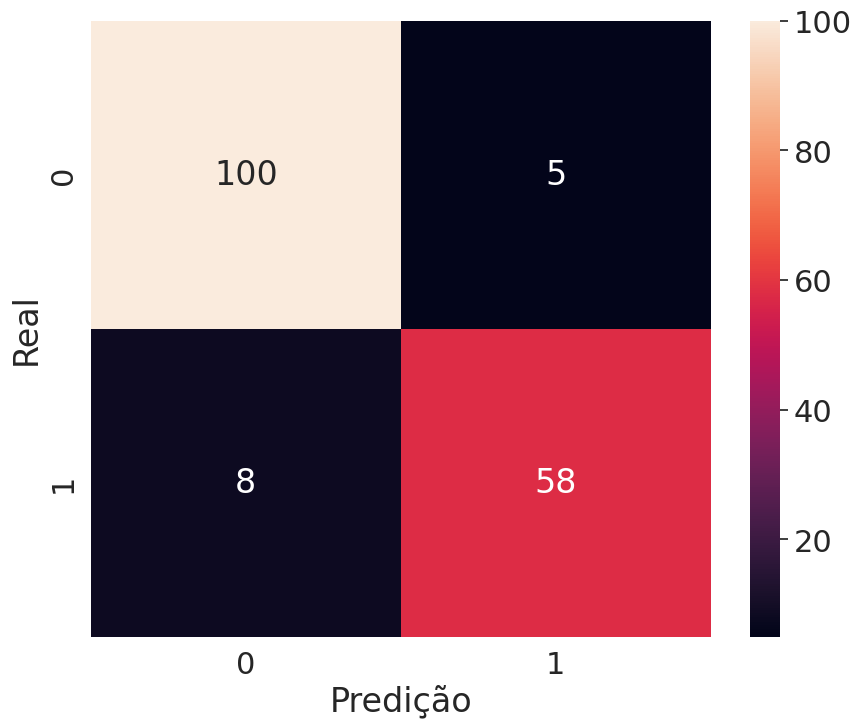

In [45]:
plt.figure(figsize = (10,8))
sns.set(font_scale = 2)
sns.heatmap(matriz_confusao, annot = True , fmt = "d").set(xlabel = "Predição", ylabel = "Real")

## Selecionar colunas pelo método RFE

In [57]:
from sklearn.feature_selection import RFE

Resultado 87.13%


[Text(0.5, 40.249999999999986, 'Predição'), Text(77.25, 0.5, 'Real')]

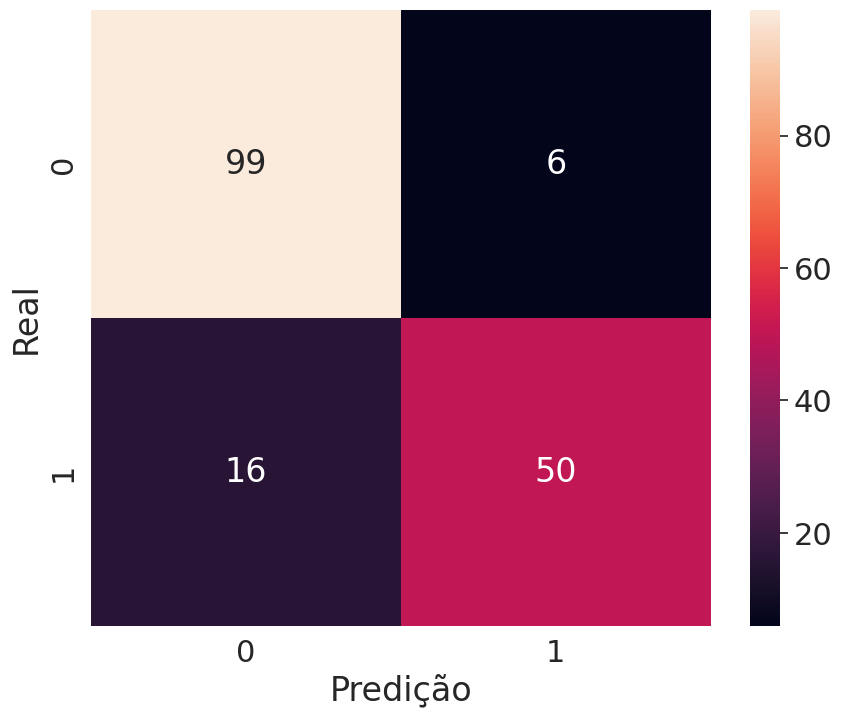

In [91]:
SEED =1234
np.random.seed(SEED)

treino_x,teste_x,treino_y,teste_y = train_test_split(exames_4,diagnostico,
                                                     test_size=0.3)
classificador = RandomForestClassifier(n_estimators =100, random_state=SEED)
classificador.fit(treino_kbest,treino_y)
selecionar_RFE = RFE(classificador, n_features_to_select = 2, step = 1)
selecionar_RFE.fit(treino_x,treino_y)
treino_rfe = selecionar_RFE.transform(treino_x)
teste_rfe = selecionar_RFE.transform(teste_x)

classificador.fit(treino_rfe,treino_y)
print(f"Resultado {classificador.score(teste_rfe,teste_y)*100:0.2f}%")
matriz_confusao = confusion_matrix(teste_y,classificador.predict(teste_rfe))
plt.figure(figsize = (10,8))
sns.set(font_scale = 2)
sns.heatmap(matriz_confusao, annot = True , fmt = "d").set(xlabel = "Predição", ylabel = "Real")

## Seleção por RFECV

Resultado 93.57%


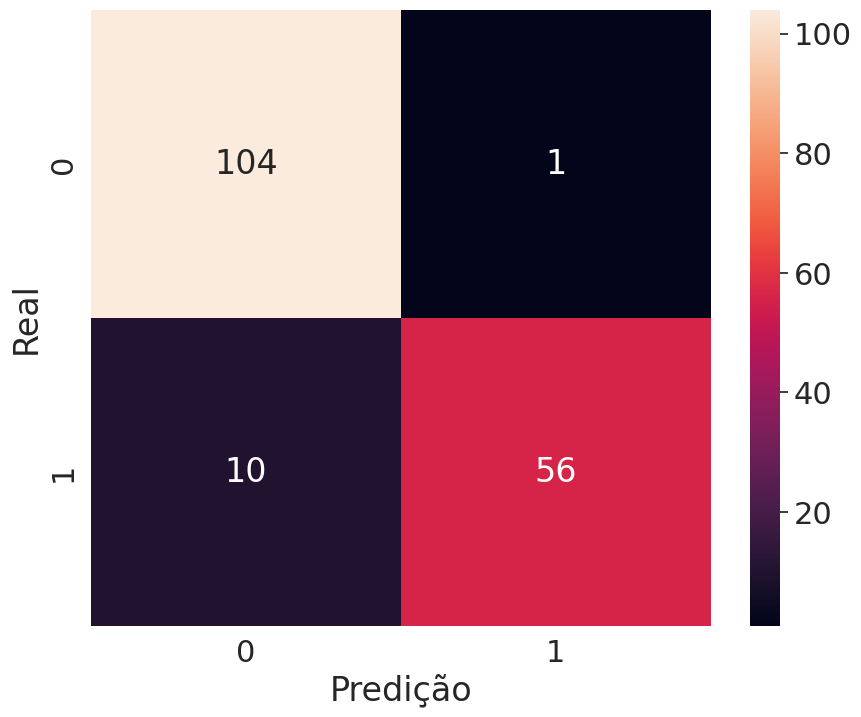

In [72]:
from sklearn.feature_selection import RFECV
SEED =1234
np.random.seed(SEED)

treino_x,teste_x,treino_y,teste_y = train_test_split(exames_4,diagnostico,
                                                     test_size=0.3)
classificador = RandomForestClassifier(n_estimators =100, random_state=SEED)
selecionar_RFECV = RFECV(classificador, cv = 7, step = 1,scoring = "accuracy")
selecionar_RFECV.fit(treino_x,treino_y)
treino_rfecv = selecionar_RFECV.transform(treino_x)
teste_rfecv = selecionar_RFECV.transform(teste_x)

classificador.fit(treino_rfecv,treino_y)
matriz_confusao = confusion_matrix(teste_y,classificador.predict(teste_rfecv))
plt.figure(figsize = (10,8))
sns.set(font_scale = 2)
sns.heatmap(matriz_confusao, annot = True , fmt = "d").set(xlabel = "Predição", ylabel = "Real")
print(f"Resultado {classificador.score(teste_rfecv,teste_y)*100:0.2f}%")

In [73]:
selecionar_RFECV.n_features_

14

In [74]:
treino_x.columns[selecionar_RFECV.support_]

Index(['exame_1', 'exame_2', 'exame_5', 'exame_8', 'exame_9', 'exame_15',
       'exame_22', 'exame_23', 'exame_25', 'exame_27', 'exame_28', 'exame_30',
       'exame_31', 'exame_32'],
      dtype='object')

In [83]:
len(selecionar_RFECV.cv_results_["mean_test_score"])

28

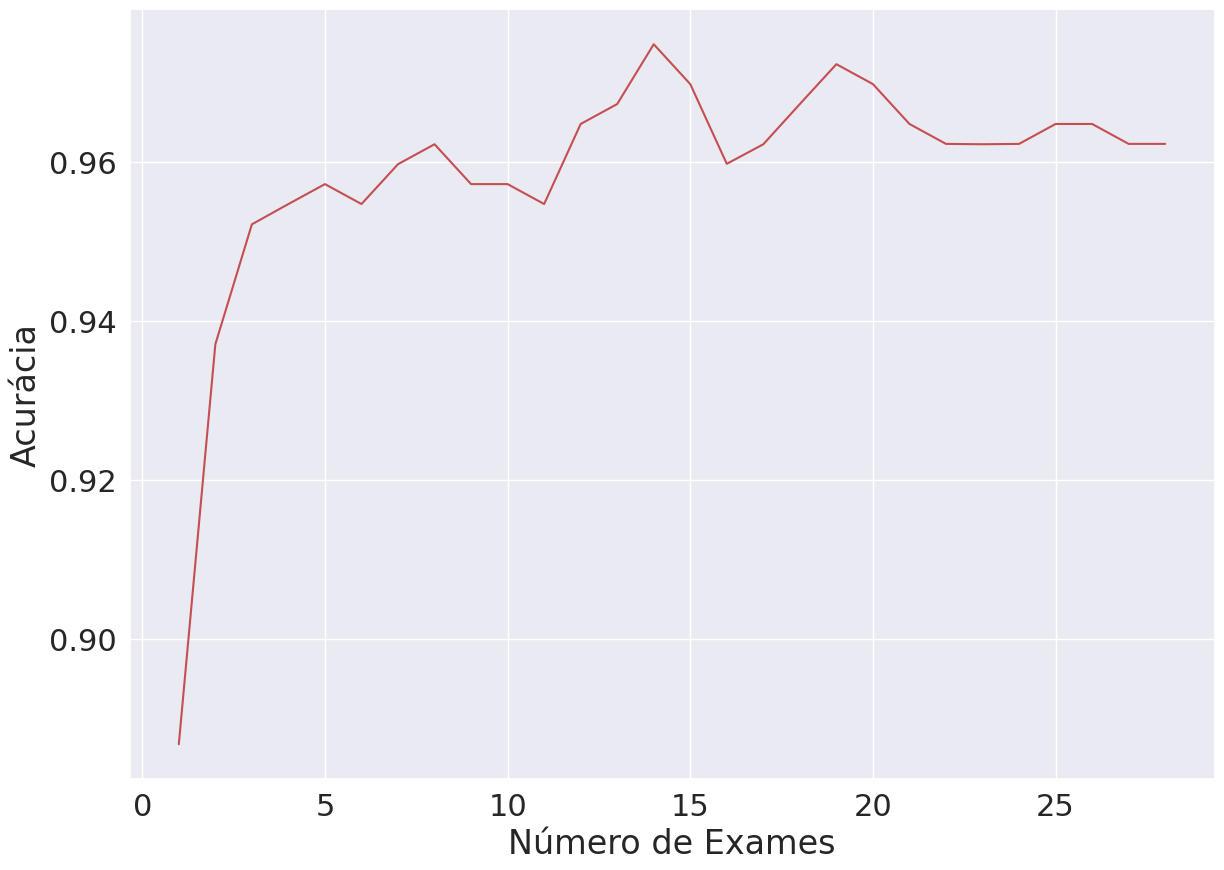

In [86]:
import matplotlib.pyplot as plt

plt.figure(figsize = (14,10))
plt.xlabel("Número de Exames")
plt.ylabel("Acurácia")
plt.plot(range(1,len(selecionar_RFECV.cv_results_["mean_test_score"])+1),selecionar_RFECV.cv_results_["mean_test_score"], color = "r")
plt.show()

## Visualizando dados no plano

In [109]:
exames_5 = selecionar_RFE.transform(exames_4)

array([[ 2.53247522,  2.29607613],
       [ 0.54814416,  1.0870843 ],
       [ 2.03723076,  1.95500035],
       ...,
       [ 0.10577736,  0.41406869],
       [ 2.65886573,  2.28998549],
       [-1.26181958, -1.74506282]])

In [94]:
exames_5.shape

(569, 2)

<Axes: >

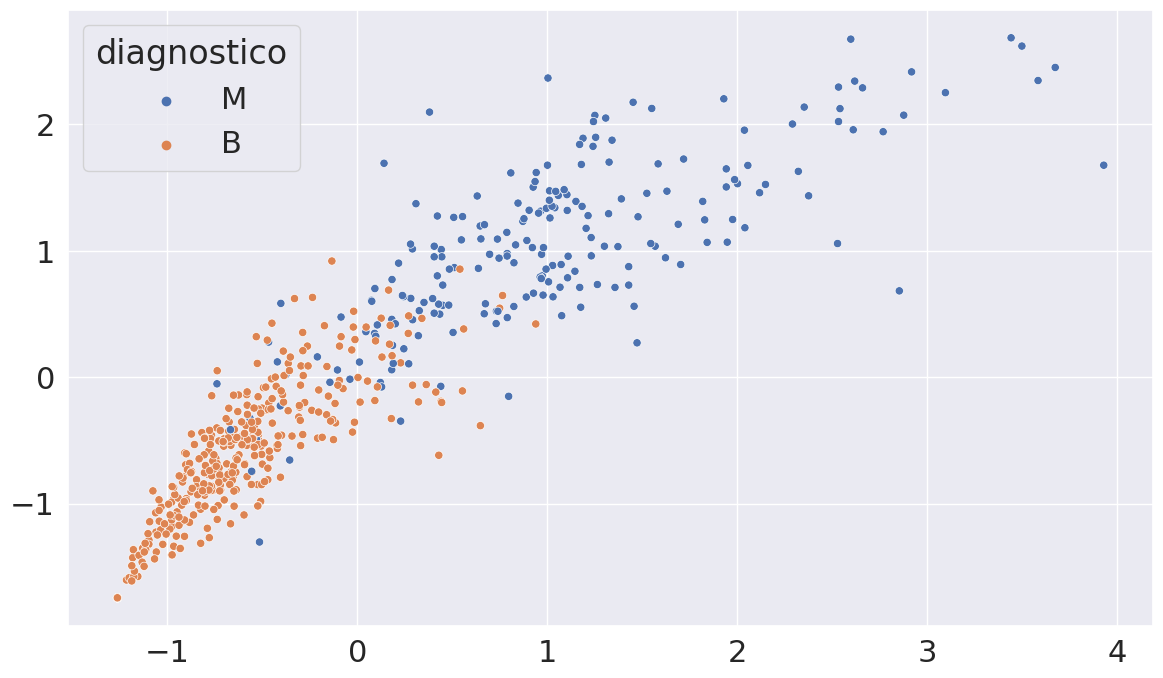

In [112]:
import seaborn as sns
plt.figure(figsize=(14,8))
sns.scatterplot(x = exames_5[:,0] , y = exames_5[:,1], hue = diagnostico)

## Método PCA

In [114]:
from sklearn.decomposition import PCA

In [116]:
pca = PCA(n_components = 2)
exames_6 = pca.fit_transform(exames_4)

In [117]:
exames_6.shape

(569, 2)

<Axes: >

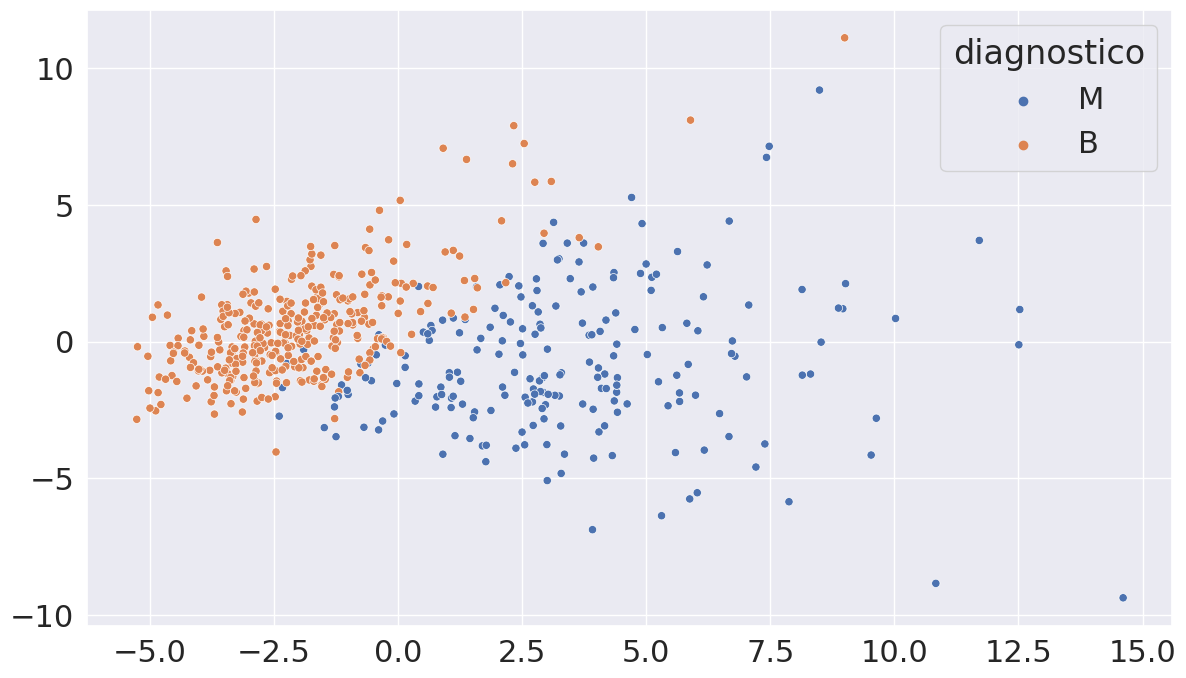

In [118]:
import seaborn as sns
plt.figure(figsize=(14,8))
sns.scatterplot(x = exames_6[:,0] , y = exames_6[:,1], hue = diagnostico)

## Técnica TSNE

In [119]:
from sklearn.manifold import TSNE

<Axes: >

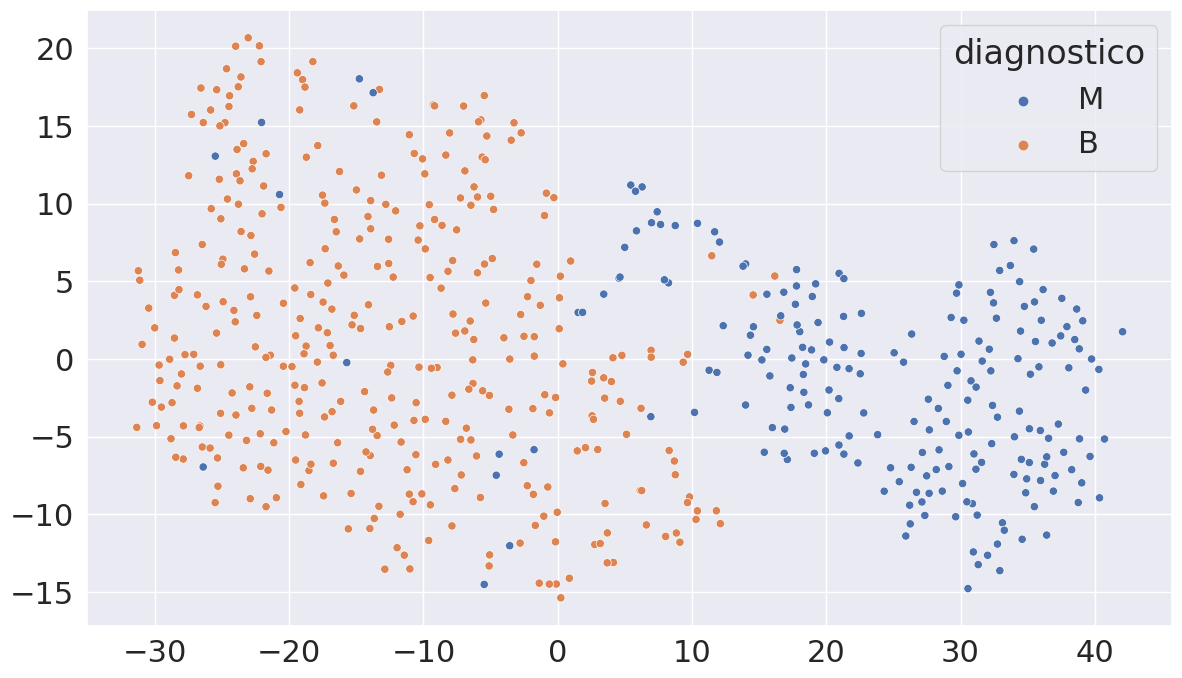

In [121]:
tsne = TSNE(n_components = 2)
exames_7 = tsne.fit_transform(exames_4)
plt.figure(figsize=(14,8))
sns.scatterplot(x = exames_7[:,0] , y = exames_7[:,1], hue = diagnostico)